In [2]:
import pandas as pd
import seaborn as sea
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier


from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [3]:
companies = pd.read_csv("../input/company-bankruptcy-prediction/data.csv")
print(companies.shape)
print(companies.columns)
companies.info()

(6819, 96)
Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Opera

In [4]:
# no missing values
companies.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

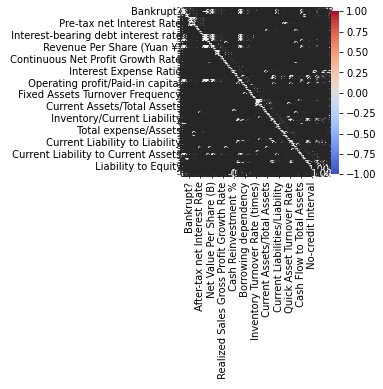

In [14]:
corr = companies.corr()
fig, ax = plt.subplots(figsize=(20,20))
sea.heatmap(corr,  cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

In [18]:
X = companies.drop(['Bankrupt?'], axis = 1)
y = companies['Bankrupt?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [21]:
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)
scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test) 

In [22]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(scaled_X_train, y_train)
pred = knn.predict(scaled_X_test)

In [23]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


[[1304    4]
 [  50    6]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1308
           1       0.60      0.11      0.18        56

    accuracy                           0.96      1364
   macro avg       0.78      0.55      0.58      1364
weighted avg       0.95      0.96      0.95      1364

